In [2]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


With object oriented

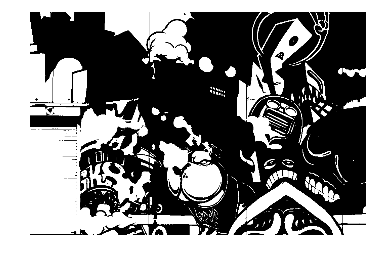

In [4]:
testdata_images_path = '../tests/images/Binary/'
testdata_features_path = '../tests/features/Binary/'

image = cv2.imread('../tests/images/Color/binarized_125.png', cv2.IMREAD_GRAYSCALE)
sr.show_image(image)

In [6]:
matfile = sio.loadmat('../tests/features/Color/holes_acc.mat')
mat_holes = np.array(matfile['holes_acc']*255, dtype='uint8')

matfile = sio.loadmat('../tests/features/Color/islands_acc.mat')
mat_islands = np.array(matfile['islands_acc']*255, dtype='uint8')

#sr.show_image(mat_holes)

In [7]:
SE = sio.loadmat(os.path.join(testdata_features_path,"SE_all.mat"))['SE_n']
lam = 45
area_factor = 0.03
connectivity = 4
binarydetector = sr.BinaryDetector(SE=SE, lam=lam, area_factor=area_factor, 
                                                connectivity=connectivity)

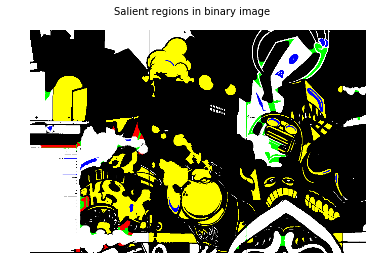

In [8]:
results = binarydetector.detect(image, find_holes=True, find_islands=True,
       find_indentations=True, find_protrusions=True, visualize=True)

In [9]:
holes_my = results['holes']
islands_my = results['islands']
indents_my = results['indentations']
prots_my = results['protrusions']

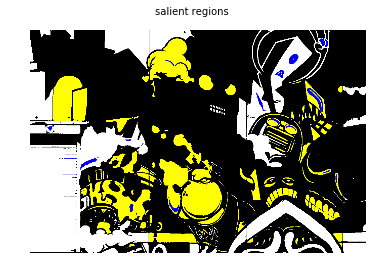

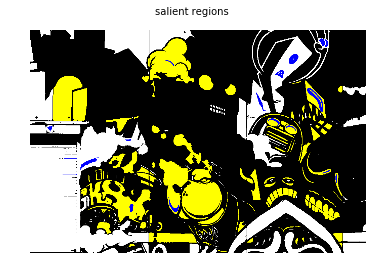

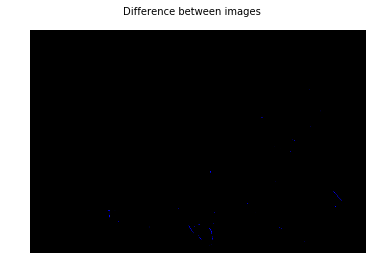

False

In [10]:
elements_visualized = sr.visualize_elements(image, holes=holes_my, islands=islands_my)
trueelements_visualized = sr.visualize_elements(image, 
                                             holes=mat_holes, islands=mat_islands )
sr.image_diff(elements_visualized, trueelements_visualized)

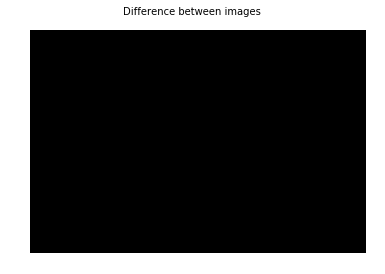

holes are correct: True


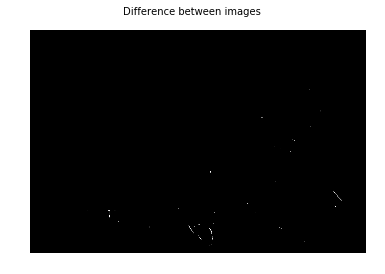

islands are correct: False


In [12]:
print('holes are correct:', sr.image_diff(mat_holes, holes_my))
print('islands are correct:', sr.image_diff(mat_islands, islands_my))